In [1]:
import pandas as pd
import numpy as np

In [11]:
model_data = pd.read_csv('/home/nilesh/Downloads/model_data_2.csv')

In [12]:
model_data.shape

(91030, 38)

In [9]:
!pip install -U scikit-learn

/bin/bash: /home/nilesh/anaconda3/envs/gpu/lib/libtinfo.so.6: no version information available (required by /bin/bash)
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.6/9.6 MB 5.5 MB/s eta 0:00:0000:0100:010m
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 298.0/298.0 kB 10.7 MB/s eta 0:00:00


In [10]:
## Data splitting and scaling
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [13]:
X = model_data.iloc[:,model_data.columns != 'cv2_cphss']
y = model_data.cv2_cphss
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=5, stratify=y)

In [14]:
!pip install lazypredict

/bin/bash: /home/nilesh/anaconda3/envs/gpu/lib/libtinfo.so.6: no version information available (required by /bin/bash)
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 193.6/193.6 MB 7.3 MB/s eta 0:00:0000:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.0/2.0 MB 20.2 MB/s eta 0:00:00a 0:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 96.6/96.6 kB 5.8 MB/s eta 0:00:00


In [15]:
from lazypredict.Supervised import LazyClassifier

clf = LazyClassifier(verbose=0, ignore_warnings=True, custom_metric=None)
models,predictions = clf.fit(X_train, X_test, y_train, y_test)
models

100%|██████████| 29/29 [20:21<00:00, 42.14s/it] 


,Accuracy,Balanced Accuracy,ROC AUC,F1 Score,Time Taken
Model,,,,,
LGBMClassifier,0.85,0.84,0.84,0.85,0.70
XGBClassifier,0.85,0.84,0.84,0.84,4.17
RandomForestClassifier,0.85,0.83,0.83,0.84,11.33
ExtraTreesClassifier,0.84,0.83,0.83,0.84,9.15
SVC,0.84,0.83,0.83,0.84,650.49
AdaBoostClassifier,0.84,0.82,0.82,0.83,3.47
LogisticRegression,0.83,0.82,0.82,0.83,0.27
LinearSVC,0.83,0.82,0.82,0.83,21.66
CalibratedClassifierCV,0.83,0.82,0.82,0.83,78.21


In [16]:
scaler = preprocessing.StandardScaler().fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [17]:
clf = LazyClassifier(verbose=0, ignore_warnings=True, custom_metric=None)
models,predictions = clf.fit(X_train_scaled, X_test_scaled, y_train, y_test)
models

100%|██████████| 29/29 [20:21<00:00, 42.13s/it] 


,Accuracy,Balanced Accuracy,ROC AUC,F1 Score,Time Taken
Model,,,,,
LGBMClassifier,0.85,0.84,0.84,0.85,0.58
XGBClassifier,0.85,0.84,0.84,0.84,4.16
RandomForestClassifier,0.85,0.83,0.83,0.84,11.34
ExtraTreesClassifier,0.84,0.83,0.83,0.84,9.12
SVC,0.84,0.83,0.83,0.84,649.77
AdaBoostClassifier,0.84,0.82,0.82,0.83,3.48
LogisticRegression,0.83,0.82,0.82,0.83,0.25
LinearSVC,0.83,0.82,0.82,0.83,21.76
CalibratedClassifierCV,0.83,0.82,0.82,0.83,77.22


In [19]:
import tensorflow
from tensorflow.keras.layers import Dense
from tensorflow.keras.models import Sequential


In [20]:
n_inputs = len(X_train.columns)

In [25]:
# define model
model = Sequential()
# define first hidden layer and visible layer
model.add(Dense(50, input_dim=n_inputs, activation='relu', kernel_initializer='he_uniform'))
# define output layer
model.add(Dense(1, activation='sigmoid'))
# define loss and optimizer
model.compile(loss='binary_crossentropy', optimizer='adam')
model.fit(X_train,y_train,epochs=10)

from sklearn.metrics import roc_auc_score
y_pred1=model.predict(X_test)

Epoch 1/10
2276/2276 [==============================] - 3s 1ms/step - loss: 54.5446
Epoch 2/10
2276/2276 [==============================] - 2s 1ms/step - loss: 21.9359
Epoch 3/10
2276/2276 [==============================] - 2s 959us/step - loss: 17.9305
Epoch 4/10
2276/2276 [==============================] - 2s 979us/step - loss: 18.4348
Epoch 5/10
2276/2276 [==============================] - 2s 994us/step - loss: 16.6942
Epoch 6/10
2276/2276 [==============================] - 2s 1ms/step - loss: 14.2804
Epoch 7/10
2276/2276 [==============================] - 2s 994us/step - loss: 14.2493
Epoch 8/10
2276/2276 [==============================] - 2s 990us/step - loss: 13.7285
Epoch 9/10
2276/2276 [==============================] - 2s 957us/step - loss: 15.9190
Epoch 10/10
569/569 [==============================] - 0s 639us/step


In [27]:
print(roc_auc_score(y_test,y_pred1))

preds = np.round(model.predict(X_test),0)
print(classification_report(y_test, preds))

0.8673984974247771
569/569 [==============================] - 1s 963us/step
              precision    recall  f1-score   support

           0       0.59      0.90      0.71      7903
           1       0.87      0.53      0.66     10303

    accuracy                           0.69     18206
   macro avg       0.73      0.71      0.69     18206
weighted avg       0.75      0.69      0.68     18206



In [41]:
weights_assigned={0:1.2,1:1}


# define model
model = Sequential()
# define first hidden layer and visible layer
model.add(Dense(50, input_dim=n_inputs, activation='relu', kernel_initializer='he_uniform'))
# define output layer
model.add(Dense(1, activation='sigmoid'))
# define loss and optimizer
model.compile(loss='binary_crossentropy', optimizer='adam')
model.fit(X_train,y_train,class_weight=weights_assigned,epochs=10)

from sklearn.metrics import roc_auc_score
y_pred1=model.predict(X_test)

Epoch 1/10
2276/2276 [==============================] - 3s 1ms/step - loss: 49.3163
Epoch 2/10
2276/2276 [==============================] - 3s 1ms/step - loss: 18.7829
Epoch 3/10
2276/2276 [==============================] - 2s 1ms/step - loss: 18.0411
Epoch 4/10
2276/2276 [==============================] - 2s 1ms/step - loss: 14.5547
Epoch 5/10
2276/2276 [==============================] - 2s 1ms/step - loss: 16.1747
Epoch 6/10
2276/2276 [==============================] - 2s 1ms/step - loss: 14.8050
Epoch 7/10
2276/2276 [==============================] - 2s 934us/step - loss: 13.7097
Epoch 8/10
2276/2276 [==============================] - 2s 1ms/step - loss: 13.6189
Epoch 9/10
2276/2276 [==============================] - 2s 1ms/step - loss: 13.0841
Epoch 10/10
569/569 [==============================] - 1s 830us/step


In [42]:
print(roc_auc_score(y_test,y_pred1))

preds = np.round(model.predict(X_test),0)
print(classification_report(y_test, preds))

0.833453458769449
569/569 [==============================] - 0s 818us/step
              precision    recall  f1-score   support

           0       0.84      0.66      0.74      7903
           1       0.78      0.90      0.84     10303

    accuracy                           0.80     18206
   macro avg       0.81      0.78      0.79     18206
weighted avg       0.80      0.80      0.79     18206



In [51]:
THRESHOLD = 0.8
preds = np.where(model.predict(X_test) > THRESHOLD, 1, 0)
print(classification_report(y_test, preds))

569/569 [==============================] - 0s 810us/step
              precision    recall  f1-score   support

           0       0.83      0.68      0.75      7903
           1       0.78      0.89      0.83     10303

    accuracy                           0.80     18206
   macro avg       0.81      0.79      0.79     18206
weighted avg       0.80      0.80      0.80     18206



569/569 [==============================] - 1s 864us/step


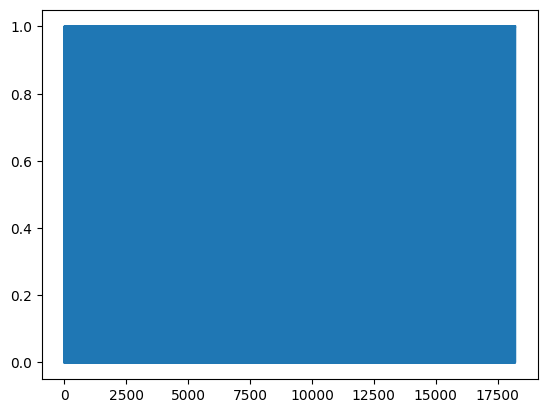

In [44]:
import matplotlib.pyplot as plt
plt.plot(np.sort(model.predict(X_test)))

In [36]:
model.predict(X_test)

569/569 [==============================] - 1s 881us/step


array([[1.7524789e-15],
       [1.0000000e+00],
       [1.0000000e+00],
       ...,
       [1.0000000e+00],
       [1.0000000e+00],
       [1.0000000e+00]], dtype=float32)

In [31]:

# importing random forest classifier from ensemble module
from sklearn.ensemble import RandomForestClassifier

# creating a RF classifier
clf = RandomForestClassifier(n_estimators = 500, max_features = 'sqrt', max_depth = 10, min_samples_leaf = 2, min_samples_split = 8) 
 
# Training the model on the training dataset
# fit function is used to train the model using the training sets as parameters
clf.fit(X_train, y_train)
 
# performing predictions on the test dataset
y_pred = clf.predict(X_test)

# metrics are used to find accuracy or error
train_acc = clf.score(X_train, y_train)
print("The Accuracy for Training Set is {}".format(train_acc*100))

test_acc = accuracy_score(y_test, y_pred)
print("The Accuracy for Test Set is {}".format(test_acc*100))

print(classification_report(y_test, y_pred))

The Accuracy for Training Set is 84.39388113808634
The Accuracy for Test Set is 84.323849280457
              precision    recall  f1-score   support

           0       0.91      0.70      0.80      7903
           1       0.81      0.95      0.87     10303

    accuracy                           0.84     18206
   macro avg       0.86      0.83      0.83     18206
weighted avg       0.85      0.84      0.84     18206



In [32]:
feature_imp = pd.Series(clf.feature_importances_, index = X_train.columns).sort_values(ascending = False)
feature_imp

Faint             0.20
Dizziness         0.14
Consciousness     0.13
Paralysis         0.12
triage            0.11
cv_cc             0.10
test1             0.05
spo2_1            0.03
sbp1              0.02
Spasm             0.01
diabetes          0.01
dbp1              0.01
cv2_phx_yn        0.01
bt1               0.01
Unnamed: 0        0.01
pr1               0.01
medical_history   0.01
rr1               0.01
cv2_act           0.00
age               0.00
stroke            0.00
Hour              0.00
Month             0.00
hypertension      0.00
Weekday           0.00
sex               0.00
onset             0.00
heart_disease     0.00
cancer            0.00
renal_failure     0.00
chest_disease     0.00
obstacle2         0.00
liver             0.00
hepatitis         0.00
tuberculosis      0.00
allergy           0.00
Disease_History   0.00
dtype: float64

In [55]:
from sklearn.ensemble import IsolationForest

ismodel = IsolationForest(contamination = 0.1)
istrain_x = X_train[y_train==0]

ismodel.fit(istrain_x)

yhat = ismodel.predict(X_test)

print(classification_report(y_test, yhat))

              precision    recall  f1-score   support

          -1       0.00      0.00      0.00         0
           0       0.00      0.00      0.00      7903
           1       0.52      0.76      0.62     10303

    accuracy                           0.43     18206
   macro avg       0.17      0.25      0.21     18206
weighted avg       0.30      0.43      0.35     18206

